This notebook determines the spectral type of the target and its companion using broadband photometry magnitude of the star (collated in TFOP) by Monte Carlo interpolating the photometry table by E. Mamajek. It seems adding the WISE photometries removes degeneracies but the mode of the sample indicates late type K star instead of the expected mid M type.

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from toi5671 import Star

/opt/miniconda3/envs/toi5671/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Target

In [3]:
target = Star("TOI-5671")
target

Mstar=(0.40,0.02) Msun
Rstar=(0.41,0.01) Rsun
Rhostar=(5.89,0.62) rhosun
teff=(3380,157) K
logg=(4.82,0.00) cgs
feh=(0.00,0.10) dex


Star(name='TOI-5671', star_params=None, source='tic')

In [4]:
target.magnitudes

,band,value,value_e,mnotes,mdate,muser,mgroup,mtag,mtabname
0,TESS,14.8084,0.007451,TIC v8.2,2019-04-15,TESS project,,,tmag
1,V,16.2700,0.200000,TIC v8.2,2019-04-15,TESS project,,,vmag
2,Gaia,16.0461,0.000662,TIC v8.2,2019-04-15,TESS project,,,gaiamag
3,u,20.5820,0.048916,TIC v8.2,2019-04-15,TESS project,,,umag
4,g,18.0417,0.006337,TIC v8.2,2019-04-15,TESS project,,,gmag
5,r,16.5480,0.004716,TIC v8.2,2019-04-15,TESS project,,,rmag
6,i,15.3389,0.005026,TIC v8.2,2019-04-15,TESS project,,,imag
7,z,14.6238,0.005237,TIC v8.2,2019-04-15,TESS project,,,zmag
8,J,13.2470,0.028000,TIC v8.2,2019-04-15,TESS project,,,jmag
9,H,12.6590,0.023000,TIC v8.2,2019-04-15,TESS project,,,hmag


In [5]:
from toi5671 import get_Mamajek_table

df = get_Mamajek_table()
df.head(), df.columns

Loaded: ../data/Mamajek_table.csv


(    #SpT     Teff   logT   BCv  logL  Mbol  R_Rsun    Mv    B-V  Bt-Vt  ...  \
 0    O3V  44900.0  4.652 -4.01  5.82 -9.81   13.43 -5.80 -0.330    NaN  ...   
 1    O4V  42900.0  4.632 -3.89  5.65 -9.39   12.13 -5.50 -0.326    NaN  ...   
 2    O5V  41400.0  4.617 -3.76  5.54 -9.11   11.45 -5.35 -0.323    NaN  ...   
 3  O5.5V  40500.0  4.607 -3.67  5.44 -8.87   10.71 -5.20 -0.322    NaN  ...   
 4    O6V  39500.0  4.597 -3.57  5.36 -8.67   10.27 -5.10 -0.321    NaN  ...   
 
    M_J  M_Ks  Ks-W1  W1-W2  W1-W3  W1-W4   g-r  i-z  z-Y  Msun  
 0  NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN  NaN  59.0  
 1  NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN  NaN  48.0  
 2  NaN   NaN    NaN    NaN    NaN    NaN -0.62  NaN  NaN  43.0  
 3  NaN   NaN    NaN    NaN    NaN    NaN -0.62  NaN  NaN  38.0  
 4  NaN   NaN    NaN    NaN    NaN    NaN -0.62  NaN  NaN  35.0  
 
 [5 rows x 31 columns],
 Index(['#SpT', 'Teff', 'logT', 'BCv', 'logL', 'Mbol', 'R_Rsun', 'Mv', 'B-V',
        'Bt-Vt', '

Loaded: ../data/Mamajek_table.csv
Gaia Teff=3589.81,637.0973304139347 K
Gaia=(16.0461,0.000662)
V=(16.27,0.2)
J=(13.247,0.028)
H=(12.659,0.023)
K=(12.362,0.023)
WISE 3.4 micron=(12.227,0.034)
WISE 4.6 micron=(12.112,0.034)
WISE 12 micron=(11.712,0.237)
G-V=-0.22+/-0.20
Gaia Bp-Rp=2.60+/-0.01
J-H=0.59+/-0.05
H-Ks=0.30+/-0.05
W1-W2=0.12+/-0.07
M5V      4256
K5V      3262
M5.5V     488
K4V       348
M6V       277
M9.5V     261
K3V       208
M6.5V     183
M8V       168
M8.5V     124
M7V       120
M7.5V     119
Name: count, dtype: int64


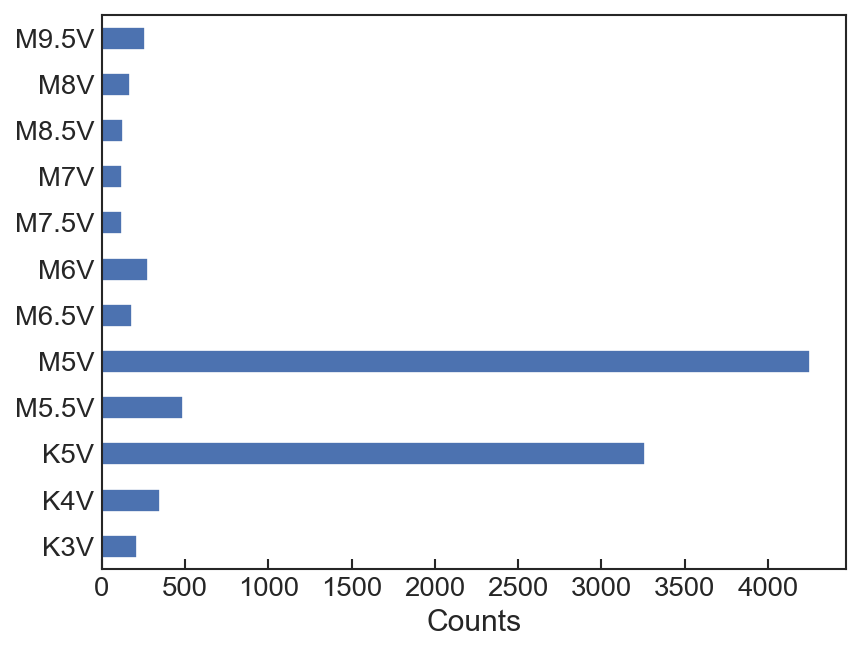

In [15]:
sptype, samples = target.get_spectral_type(columns=['Teff', 
                                                    'G-V', 
                                                    'Bp-Rp',
                                                    'J-H', 
                                                    'H-Ks', 
                                                    'W1-W2', # important
                                                    # 'W1-W3'
                                                   ], 
                                         return_samples=True, plot=True)

## Companion

In [8]:
companion = Star("TOI-5648")
companion

Mstar=(0.51,0.02) Msun
Rstar=(0.51,0.02) Rsun
Rhostar=(3.79,0.38) rhosun
teff=(3571,157) K
logg=(4.73,0.01) cgs
feh=(0.00,0.10) dex


Star(name='TOI-5648', star_params=None, source='tic')

In [9]:
companion.magnitudes

,band,value,value_e,mnotes,mdate,muser,mgroup,mtag,mtabname
0,TESS,13.8994,0.007322,TIC v8.2,2019-04-15,TESS project,,,tmag
1,B,17.4610,0.161000,TIC v8.2,2019-04-15,TESS project,,,bmag
2,V,15.4100,0.200000,TIC v8.2,2019-04-15,TESS project,,,vmag
3,Gaia,15.0191,0.000352,TIC v8.2,2019-04-15,TESS project,,,gaiamag
4,u,19.4133,0.023897,TIC v8.2,2019-04-15,TESS project,,,umag
5,g,16.7600,0.004731,TIC v8.2,2019-04-15,TESS project,,,gmag
6,r,15.3458,0.004364,TIC v8.2,2019-04-15,TESS project,,,rmag
7,i,14.3475,0.004772,TIC v8.2,2019-04-15,TESS project,,,imag
8,z,13.7822,0.004755,TIC v8.2,2019-04-15,TESS project,,,zmag
9,J,12.5040,0.018000,TIC v8.2,2019-04-15,TESS project,,,jmag


Loaded: ../data/Mamajek_table.csv
Gaia Teff=3850.5,617.9385294873591 K
Gaia=(15.0191,0.000352)
V=(15.41,0.2)
J=(12.504,0.018)
H=(11.823,0.024)
K=(11.633,0.023)
WISE 3.4 micron=(11.535,0.026)
WISE 4.6 micron=(11.484,0.026)
WISE 12 micron=(11.136,0.14)
G-V=-0.39+/-0.20
Gaia Bp-Rp=2.27+/-0.01
J-H=0.68+/-0.04
H-Ks=0.19+/-0.05
W1-W2=0.05+/-0.05
K5V      4167
M5V      3575
K4V       610
K3V       435
M5.5V     244
M6V       160
K2V       152
Name: count, dtype: int64


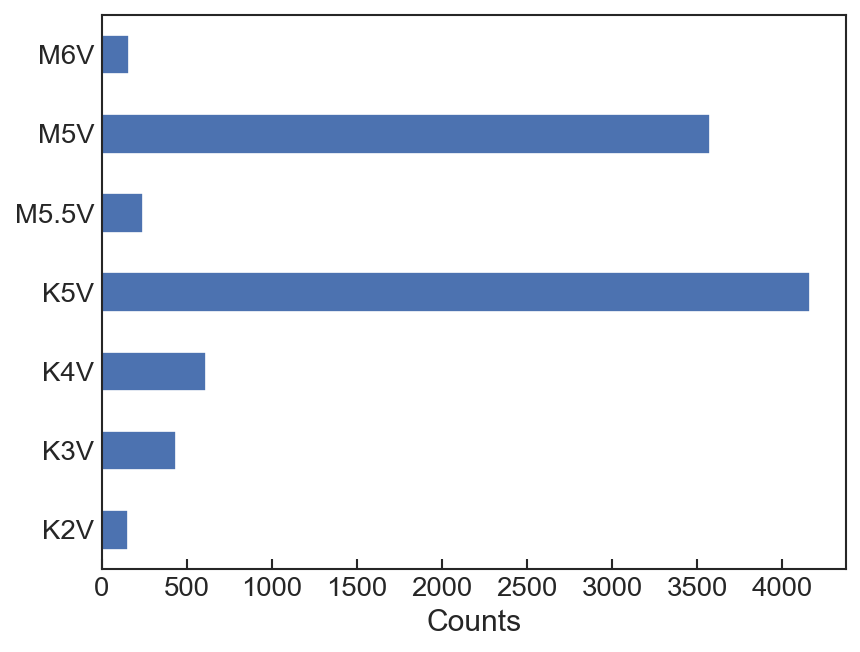

In [16]:
sptype, samples = companion.get_spectral_type(columns=['Teff', 
                                                    'G-V', 
                                                    'Bp-Rp',
                                                    'J-H', 
                                                    'H-Ks', 
                                                    'W1-W2', # important
                                                    # 'W1-W3'
                                                   ], 
                                         return_samples=True, plot=True)